<a href="https://colab.research.google.com/github/shuvechchha/Titanic-Survival-Prediction-Model/blob/main/Titanic_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Titanic Decision Tree
In this assignment you will construct two decision trees from a data set based on the passenger manifest of the Titanic. The decision trees are attempting to predict survival given the known features of the passengers. You are given initial code to read in the dataset and prep it for your work.

You will be able to refer to other notebooks that we have used in class for help with your code. Particularly, the two Decision Tree notebooks and the Cross Validation notebooks (for the performance measures, this assignment doesn't use cross validation).

Submit your assignment by sharing it with hollinsdatascience@gmail.com

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
ti = pd.read_csv("/content/drive/MyDrive/HDS/Datasets/titanic_tab_separated.tsv", sep="\t")
ti.head()

,Class,Age,Sex,Survived
0,First,Adult,Male,Yes
1,First,Adult,Male,Yes
2,First,Adult,Male,Yes
3,First,Adult,Male,Yes
4,First,Adult,Male,Yes


In [ ]:
ti["Class"] = ti["Class"].replace({'First' : 3, 'Second' : 2, 'Third': 1, 'Crew': 0})
ti["Age"] = ti["Age"].replace({'Adult' : 1, 'Child' : 0})
ti["Sex"] = ti["Sex"].replace({'Female' : 1, 'Male' : 0})
ti["Survived"] = ti["Survived"].replace({'Yes' : 1, 'No' : 0})
ti.head()

,Class,Age,Sex,Survived
0,3,1,0,1
1,3,1,0,1
2,3,1,0,1
3,3,1,0,1
4,3,1,0,1


1) Separate the data into training and test sets. The test set should be 20% of the total data. You will then need to pull out the features and targets of each set (make sure you include all of the feature columns).

In [ ]:
# Create training and test sets
training_set, test_set = train_test_split(ti, test_size=0.20)
training_features = training_set.iloc[:,0:3]

# Targets are at the end
training_targets = training_set.iloc[:,-1]

# Pull out the same features and targets from test set
testing_features = test_set.iloc[:,0:3]
testing_targets = test_set.iloc[:,-1]

2) Build a decision tree based on the training data. The defaults for building a tree are fine (gini impurity). Output the graph of the tree as in the notebooks we have looked at in class.

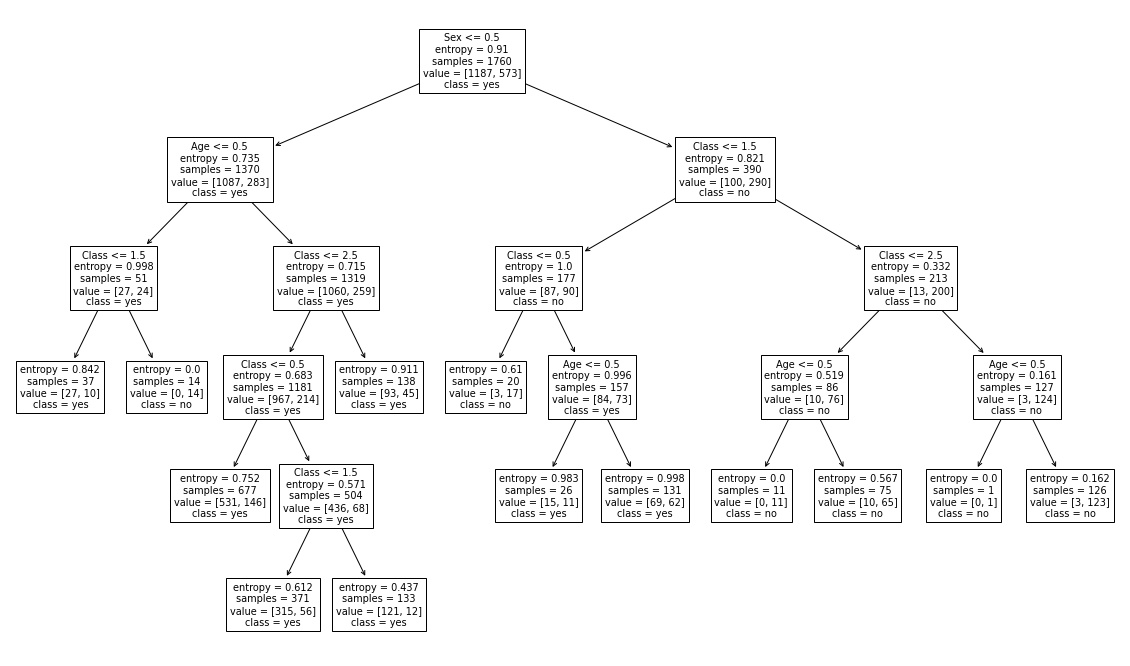

In [ ]:
# Create and fit the model using entropy separation and a maximum depth
dt_model = tree.DecisionTreeClassifier(criterion='entropy')
dt_model.fit(training_features, training_targets)


plt.figure(figsize=(20,12))
tree.plot_tree(dt_model, feature_names=ti.columns[:-1], class_names=['yes', 'no'])
plt.show()

3) Produce a confusion matrix from the trees predictions on the test data. From the matrix calculate accuracy, precision, recall and f1 score. Look back at the tree and identify which branches resulted in false positives or false negatives. (You can include this commentary in a markdown cell).


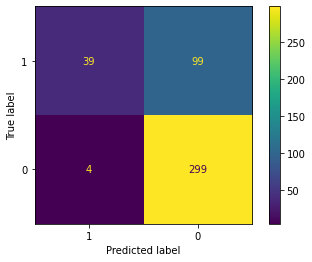

In [ ]:
plot_confusion_matrix(dt_model, testing_features, testing_targets, values_format='d',labels=[1,0])

Looking at the tree, an example of false positive can be denoted by one of the branches that correspond to Class less than or equal to 1.5 where Class equals 'no'. Similarly, an example of false negative can be given by one of the branches that correspond to Class less than or equal to 0.5 where Age is less than or equal to 0.5. 

In [ ]:
cf = confusion_matrix(testing_targets, dt_model.predict(testing_features), labels=[1,0])

TP = cf[0][0]
FN = cf[0][1]
FP = cf[1][0]
TN = cf[1][1]

accuracy = (TP + TN)/(TP + FN + FP + TN)
print("accuracy:", accuracy)

recall = TP/(TP + FN)
print("recall:", recall)

precision = TP/(TP + FP)
print("precision:", precision)

f1_score = (2*precision * recall)/(precision+recall)
print("f1_score:", f1_score)

accuracy: 0.7664399092970522
recall: 0.2826086956521739
precision: 0.9069767441860465
f1_score: 0.430939226519337


4) Build a second decision tree. This tree will be restricted to have a max-depth of one. This pre-pruning results in a much smaller tree. Output a graph of this tree.


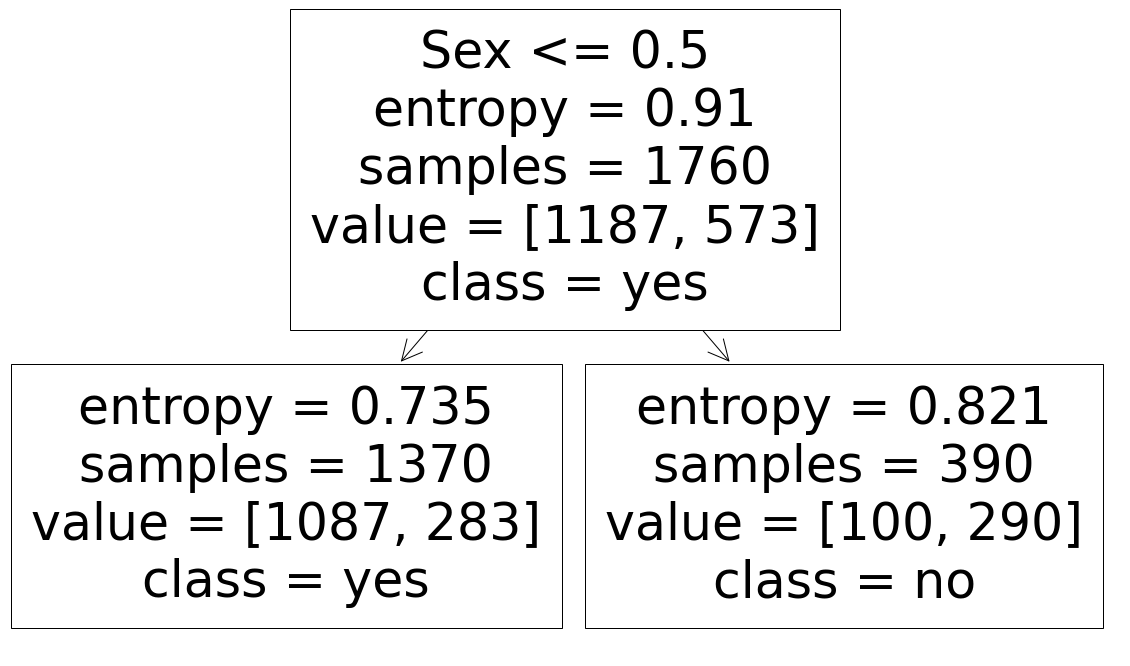

In [ ]:
dt_model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
dt_model2.fit(training_features, training_targets)


plt.figure(figsize=(20,12))
tree.plot_tree(dt_model2, feature_names=ti.columns[:-1], class_names=['yes', 'no'])
plt.show()

5) Produce a confusion matrix and calculate the same performance measures for this second tree. How much better or worse is this tree (in terms of accuracy, precision, recall, f1 score)?

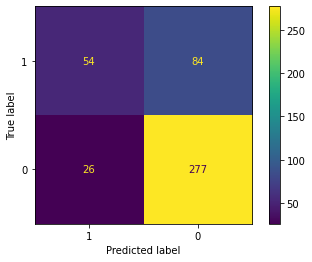

In [ ]:
plot_confusion_matrix(dt_model2, testing_features, testing_targets, values_format='d',labels=[1,0])

In [ ]:
cf = confusion_matrix(testing_targets, dt_model2.predict(testing_features), labels=[1,0])

TP = cf[0][0]
FN = cf[0][1]
FP = cf[1][0]
TN = cf[1][1]

accuracy = (TP + TN)/(TP + FN + FP + TN)
print("accuracy:", accuracy)

recall = TP/(TP + FN)
print("recall:", recall)

precision = TP/(TP + FP)
print("precision:", precision)

f1_score = (2*precision * recall)/(precision+recall)
print("f1_score:", f1_score)

accuracy: 0.7505668934240363
recall: 0.391304347826087
precision: 0.675
f1_score: 0.4954128440366973


Previous tree is better in accuracy by 0.0158 and precision by 0.232 whereas this tree is better in recall by 0.1087 and f1 score by 0.0645.